In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

%matplotlib inline

In [2]:
# Importing data 
data_claims = pd.read_csv('claims.csv', engine='pyarrow').convert_dtypes()
data_demo = pd.read_csv('cust_demographics.csv', engine='pyarrow').convert_dtypes()


In [3]:
data_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1,No


In [4]:
data_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   claim_id             1100 non-null   Int64 
 1   customer_id          1100 non-null   Int64 
 2   incident_cause       1100 non-null   string
 3   claim_date           1100 non-null   string
 4   claim_area           1100 non-null   string
 5   police_report        1100 non-null   string
 6   claim_type           1100 non-null   string
 7   claim_amount         1035 non-null   string
 8   total_policy_claims  1090 non-null   Int64 
 9   fraudulent           1100 non-null   string
dtypes: Int64(3), string(7)
memory usage: 89.3 KB


In [5]:
data_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
data_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   Int64 
 1   gender       1085 non-null   string
 2   DateOfBirth  1085 non-null   string
 3   State        1085 non-null   string
 4   Contact      1085 non-null   string
 5   Segment      1085 non-null   string
dtypes: Int64(1), string(5)
memory usage: 52.0 KB


In [7]:
final_data = pd.merge(left=data_claims, right=data_demo, left_on='customer_id', right_on='CUST_ID', how='left' )

In [8]:
final_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1,No,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [9]:
# dropping the column CUST_ID because it the duplicate of customer_id
final_data = final_data.drop('CUST_ID', axis=1)

In [10]:
# Q2: Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   claim_id             1100 non-null   Int64 
 1   customer_id          1100 non-null   Int64 
 2   incident_cause       1100 non-null   string
 3   claim_date           1100 non-null   string
 4   claim_area           1100 non-null   string
 5   police_report        1100 non-null   string
 6   claim_type           1100 non-null   string
 7   claim_amount         1035 non-null   string
 8   total_policy_claims  1090 non-null   Int64 
 9   fraudulent           1100 non-null   string
 10  gender               1085 non-null   string
 11  DateOfBirth          1085 non-null   string
 12  State                1085 non-null   string
 13  Contact              1085 non-null   string
 14  Segment              1085 non-null   string
dtypes: Int64(3), string(12)
memory usage: 132.3 KB



# Findings:
1. The data type of columns claim_date & DateOfBirth is string, it should be DATE
2. The data type of column claim_amount is string, it should be numeric


In [11]:
final_data['claim_date'] = pd.to_datetime(final_data['claim_date'], format='%m/%d/%Y')

In [12]:
final_data['DateOfBirth'] = pd.to_datetime(final_data['DateOfBirth'], format='%d-%b-%y')

In [13]:
final_data[final_data['DateOfBirth'].dt.year > 2023]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,$2748.5,2,Yes,Female,2066-09-09,RI,165-519-4583,Gold
13,53780662,21240703,Other driver error,2018-09-19,Auto,Unknown,Material only,$1050,1,No,Male,2063-07-22,MD,473-561-2675,Silver
17,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,$17800,1,No,Male,2066-09-07,IL,146-157-4572,Platinum
18,29205389,17004138,Natural causes,2017-06-25,Auto,No,Injury only,$31380,1,No,Female,2065-08-13,WA,436-354-4682,Silver
20,32630720,75584003,Crime,2017-02-03,Auto,No,Material only,<NA>,1,No,Female,2067-04-22,OK,723-418-3248,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,38011383,56425562,Natural causes,2017-09-14,Auto,No,Material only,$1670,1,No,Female,2063-03-18,GA,823-712-3528,Platinum
1074,36599575,87596868,Driver error,2018-10-09,Auto,Unknown,Injury only,$33330,2,No,Male,2061-11-18,AZ,573-396-3182,Silver
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,$2290,1,No,Male,2064-04-22,VA,286-128-6132,Platinum
1079,72025178,46850495,Other causes,2017-11-27,Auto,Yes,Material only,$2173.5,1,Yes,Male,2062-08-21,NV,761-193-2346,Platinum


In [14]:
# There are some DateOfBirth where date is after the claim date & the DateOfBirth is more than the current date, which is not possible. So, in case where DateOfBirth is more than current date, we are subtracting the year by 100

final_data['DateOfBirth'] = np.where(final_data['DateOfBirth'].dt.year > dt.datetime.today().year, final_data['DateOfBirth'] - pd.offsets.DateOffset(years=100), final_data['DateOfBirth'])

In [15]:
# Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

# there are some values in claim_amount which are "NA". So, replacing theses values by "$0"
final_data['claim_amount']=final_data.claim_amount.fillna('$0')

In [16]:
# converting the claim_amount column to numeric data type. lambda function is use to remove the $ sign for each value
final_data['claim_amount'] = pd.to_numeric(final_data['claim_amount'].apply(lambda x: str(x)[1:]))

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   Int64         
 1   customer_id          1100 non-null   Int64         
 2   incident_cause       1100 non-null   string        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   string        
 5   police_report        1100 non-null   string        
 6   claim_type           1100 non-null   string        
 7   claim_amount         1100 non-null   float64       
 8   total_policy_claims  1090 non-null   Int64         
 9   fraudulent           1100 non-null   string        
 10  gender               1085 non-null   string        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   string        
 13  Contact              1085 non-nul

In [18]:
# Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

# we have created a new column called injury_unreported_flag, where if the claim type has 'injury' in it & if the police report is 'No', then it is flagged as 1
final_data['injury_unreported_flag'] = np.where((((final_data['claim_type'] != 'Material only') & (final_data['police_report'] =='No'))), 1, 0)

In [19]:
# Q5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [20]:
final_data = final_data.sort_values('claim_date', ascending=False).drop_duplicates('customer_id', keep='first')

In [21]:
# Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

def fill_categorical_values():
    """
    This is a function that takes all categorical columns & fills the null values in these columns with mode of the column
    """
    for i in final_data.select_dtypes('string').columns:
        final_data[i].fillna(final_data[i].mode().to_string(index=False), inplace=True)

def fill_numerical_values():
    """
    This is a function that takes all numerical columns & fills the null values in these columns with mean of the column
    """
    for i in final_data.select_dtypes('number').columns:
        if final_data[i].dtypes == 'Int64':
            final_data[i].fillna(np.round(final_data[i].mean()), inplace=True)
        else:
            final_data[i].fillna(final_data[i].mean(), inplace=True)

fill_categorical_values()
fill_numerical_values()

In [22]:
# Q.7 Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18, Youth 18-30, Adult 30-60, Senior > 60

def func_age(born):
    """
    function to calculate age of customer
    """
    today = dt.date.today()
    return today.year - born.year - ((today.month, today.day) <  (born.month, born.day))

final_data['age'] = final_data['DateOfBirth'].apply(func_age)

def func_cust_category(a):
    if a < 18:
        return 'Children'
    elif a <= 30:
        return 'Youth'
    elif a <= 60:
        return 'Adult'
    elif a> 60:
        return 'Senior'
    else:
        return 
        
final_data['cust_category'] = final_data['age'].apply(func_cust_category)

In [23]:
# Q.8 What is the average amount claimed by the customers from various segments? 

final_data.groupby(['Segment']).agg({'claim_amount':'mean'}).T

Segment,Gold,Platinum,Silver
claim_amount,12050.624352,11852.192521,11256.15896


In [24]:
# Q.9 What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018
date = '2018-10-01'

new_date = dt.datetime.strptime(date,'%Y-%m-%d') - dt.timedelta(days = 20)
final_data[final_data['claim_date'] < new_date].groupby(['incident_cause']).agg({'claim_amount':'sum'})

,claim_amount
incident_cause,
Crime,664582.0
Driver error,3194840.0
Natural causes,1203021.5
Other causes,3540989.0
Other driver error,3180621.5


In [25]:
# Q 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?
search_string = 'driver'
len(final_data[(final_data['cust_category'] == 'Adult') & (final_data['State'].isin(['TX','DE','AK'])) & (final_data['incident_cause'].str.find(search_string) >= 0)])

10

the pie chart for Male between the aggregated value of claim amount based on segment is:


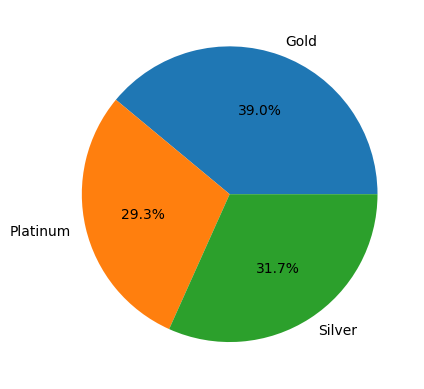

the pie chart for Female between the aggregated value of claim amount based on segment is:


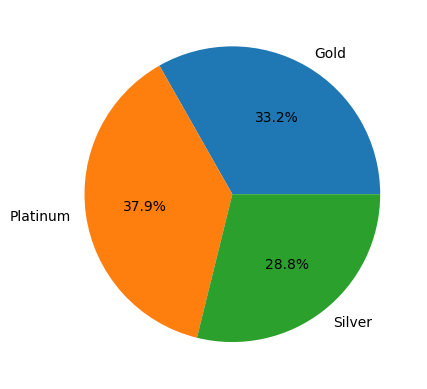

In [26]:
# Q 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.
for gender in final_data['gender'].unique():
    print(f'the pie chart for {gender} between the aggregated value of claim amount based on segment is:')
    label = final_data['Segment'].unique()
    data = final_data[final_data['gender'] == gender].groupby(['Segment']).agg({'claim_amount':'sum'}).reset_index()['claim_amount']
    plt.pie(data, labels=label, autopct='%1.1f%%')
    plt.show()

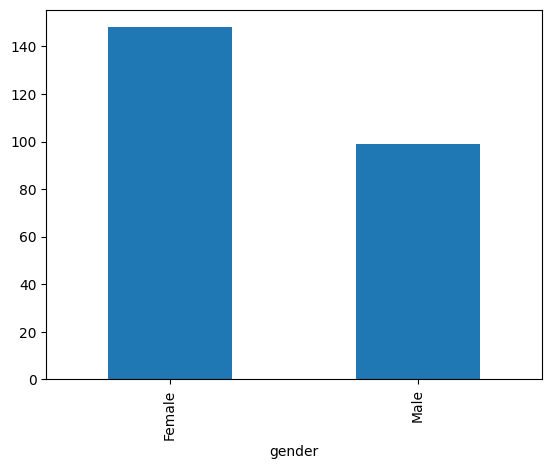

In [27]:
# Q 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart
search_string = 'driver'
final_data[final_data['incident_cause'].str.find(search_string) >= 0].groupby(['gender'])['gender'].count().plot(kind='bar')
plt.show()

<Axes: xlabel='cust_category'>

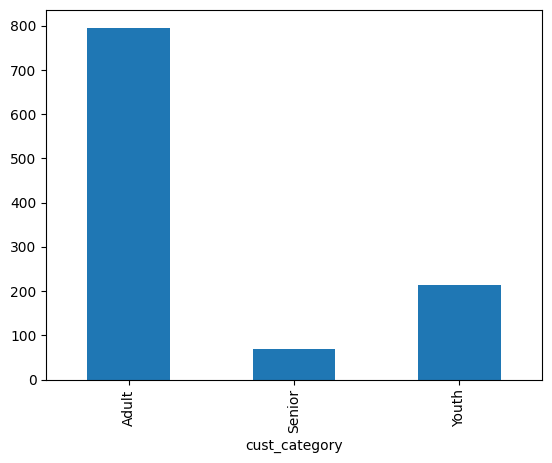

In [28]:
# Q 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart
final_data.groupby(['cust_category'])['cust_category'].count().plot(kind='bar')

<Axes: xlabel='claim_month'>

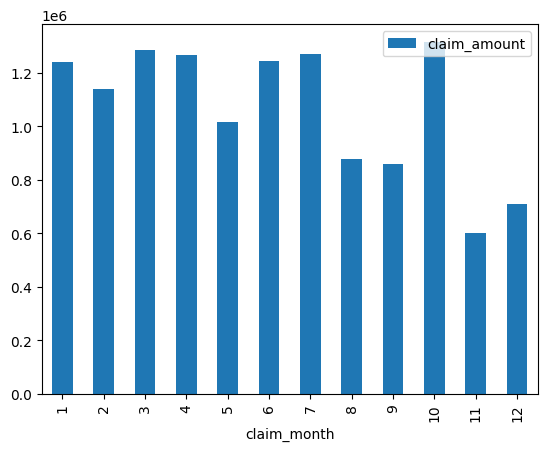

In [29]:
# Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order

final_data['claim_month'] = final_data['claim_date'].dt.month  # creating a new column for claim month

final_data.groupby(['claim_month']).agg({'claim_amount':'sum'}).plot(kind='bar')

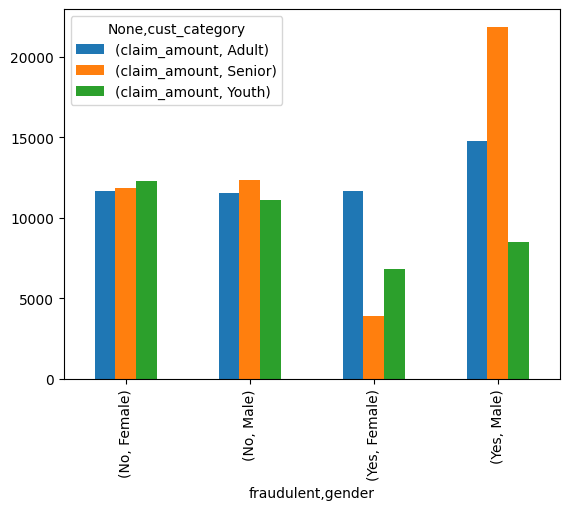

In [30]:
# Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

final_data.groupby(['fraudulent','gender','cust_category']).agg({'claim_amount':'mean'}).unstack().plot(kind='bar')
plt.show()

In [31]:
# Q16. Is there any similarity in the amount claimed by males and females?   
claims_male = final_data[final_data['gender']=='Male']
claims_female = final_data[final_data['gender']=='Female']

# Ho: Claim amount by Male & Female are same
# Ha: Claim amount by Male & Female are NOT same
# CI=95% , p=0.05
# we have 1 categorical & 1 continuous variable so, we are performing ANOVA test
stats.f_oneway(claims_male.claim_amount, claims_female.claim_amount)
# At CI of 95%, calculated p-value is greater than 0.05. SO, we FAIL to reject the NULL hypothesis.

# Business Conclusion:
# So, amount claimed by males and females are similar.

F_onewayResult(statistic=0.5583985459284883, pvalue=0.45506723037216323)

In [32]:
# Q17. Is there any relationship between age category and segment?

# Ho: There is no relationship between category & segment
# Ha: There is a relationship between category & segment
# CI=95%, p=0.05
# category & segment are categorical variables, we use Chi-square test

#get the observed frequency table 
obs_freq = pd.crosstab(index=final_data['cust_category'], columns=final_data['Segment'])
obs_freq

Segment,Gold,Platinum,Silver
cust_category,,,
Adult,274,267,255
Senior,26,23,20
Youth,71,71,71


In [33]:
# performing the chi-square test
stats.chi2_contingency(obs_freq)

# At CI of 95%, calculated p-value is greater than 0.05. SO, we FAIL to reject the NULL hypothesis.

# Business Conclusion:
# So, There is no relationship between category & segment

Chi2ContingencyResult(statistic=0.5995405692287782, pvalue=0.9631147264043342, dof=4, expected_freq=array([[273.94805195, 266.56400742, 255.48794063],
       [ 23.74675325,  23.10667904,  22.14656772],
       [ 73.30519481,  71.32931354,  68.36549165]]))

In [34]:
# Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

# here we are comparing claim_amount for 2017-18 to fiscal average for 2016-17 of $10,000
# Ho: Average claim amount is $10,000 
# Ha: Average claim amount is NOT $10,000 
# at CI=95%, p=0.05

# comparing the claim_amount for 2017-18 to $10,000. So, we perform one sample t-test
claim_amount_2017_18 = final_data[(final_data['claim_date']>'2017-04-01') & (final_data['claim_date']<'2018-04-01')]['claim_amount']
stats.ttest_1samp(a=claim_amount_2017_18, popmean=10000)

# At CI of 95%, calculated p-value is less than 0.05. SO, we reject the NULL hypothesis.

# Business Conclusion:
# So, The Average claim amount for 2017-18 is NOT $10,000 

TtestResult(statistic=3.9573762237461283, pvalue=8.519057058169556e-05, df=579)

In [35]:
# Based on the hypothesis testing done above, we can say that mean is NOT $10,000
# In this case, we are comparing the average claim amount for fiscal 2016-17 & 2017-18
print(f"The average claim amount for fiscal 2017-18: {final_data[(final_data['claim_date']>'2017-04-01') & (final_data['claim_date']<'2018-04-01')]['claim_amount'].mean()}")
# average claim amount for 2017-18 is higher than 2016-17

# Business conclusion:
# There is an increase in the average claim amount from 2016-17 to 2017-18.

The average claim amount for fiscal 2017-18: 12303.596551724138


In [36]:
# Q19. Is there any difference between age groups and insurance claims?

# Ho: There is NO diffrence between age groups
# Ha: There is a difference between age groups
# CI=95%, p=0.05
# cust_category is categrical & claim_amount is continuous. So,we are performing ANOVA test

cust_adult = final_data[final_data['cust_category']=='Adult']['claim_amount']
cust_youth = final_data[final_data['cust_category']=='Youth']['claim_amount']
cust_senior = final_data[final_data['cust_category']=='Senior']['claim_amount']
stats.f_oneway(cust_adult, cust_youth, cust_senior)
# At CI of 95%, calculated p-value is greater than 0.05. SO, we FAIL to reject the NULL hypothesis.

# Business Conclusion:
# There is NO difference between age groups and insurance claims

F_onewayResult(statistic=0.4943590407769917, pvalue=0.6101003423172477)

In [37]:
# Q20. Is there any relationship between total number of policy claims and the claimed amount?

# Ho: There is no relationship between total number of policy claims and the claimed amount
# Ha: There is a relationship between total number of policy claims and the claimed amount
# Both are continuous variable, we will use correlation to find the relationship between 2 continuous variables
print(stats.pearsonr(x=final_data['total_policy_claims'], y=final_data['claim_amount']))
print('SpearmanResult:',stats.spearmanr(final_data['total_policy_claims'], final_data['claim_amount']))
# At CI of 95%, calculated p-value is greater than 0.05. SO, we FAIL to reject the NULL hypothesis.

# Business Conclusion:
# There is NO relationship between total number of policy claims and the claimed amount

PearsonRResult(statistic=-0.020913327652017803, pvalue=0.4897600450273102)
SpearmanResult: SignificanceResult(statistic=0.011274637512238053, pvalue=0.7096463870849663)
